# Part 1:  Simple linear regression for one independent variable

In this lab, you will load data, plot data, perform simple mathematical manipulations, and fit a simple linear regression model.  Before doing this lab, you can go through the class demo on simple linear regression for an automobile dataset.  The lab use the Ames Housing dataset which is a commonly used machine learning data set for illustrating basic concepts.  

## Acknowledgement

This lab is imported from prof. Christopher Musco's 2024 iteration of CS-GY 6923. Thanks Chris!

## Loading the data

The Ames housing data set was collected in 2011 and contains information about home sales in Ames, Iowa, including the sale price and numerical and categorical information about each home. We have constructed a "reduced" version of the dataset that is available at:

https://www.chrismusco.com/machinelearning2024_grad/AmesHousing.csv.

More information about the meaning of each column can be found here: https://cran.r-project.org/web/packages/AmesHousing/AmesHousing.pdf. Note that our version of the dataset contains a subset of the columns in the original dataset and the last column, SalesPrice, is in units of 1000s of US dollars in our version.

In the lab, you will complete all the code marked `TODO`.

First, complete the following code that uses the `pd.read_csv` command to read the data from the file linked above.

In [39]:
import pandas as pd
import numpy as np
# TODO:  Complete the code
df = pd.read_csv("./AmesHousing.csv")
df.head()

,Lot Area,Year Built,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Gr Liv Area,Full Bath,Half Bath,Bedroom AbvGr,TotRms AbvGrd,Fireplaces,Garage Cars,Garage Area,SalePrice
0,31770,1960,441.0,1080.0,1656,0,1656,1,0,3,7,2,2.0,528.0,215.0
1,11622,1961,270.0,882.0,896,0,896,1,0,2,5,0,1.0,730.0,105.0
2,14267,1958,406.0,1329.0,1329,0,1329,1,1,3,6,0,1.0,312.0,172.0
3,11160,1968,1045.0,2110.0,2110,0,2110,2,1,3,8,2,2.0,522.0,244.0
4,13830,1997,137.0,928.0,928,701,1629,2,1,3,6,1,2.0,482.0,189.9


Display the first six rows of the data frame

In [40]:
df.head(6)

,Lot Area,Year Built,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Gr Liv Area,Full Bath,Half Bath,Bedroom AbvGr,TotRms AbvGrd,Fireplaces,Garage Cars,Garage Area,SalePrice
0,31770,1960,441.0,1080.0,1656,0,1656,1,0,3,7,2,2.0,528.0,215.0
1,11622,1961,270.0,882.0,896,0,896,1,0,2,5,0,1.0,730.0,105.0
2,14267,1958,406.0,1329.0,1329,0,1329,1,1,3,6,0,1.0,312.0,172.0
3,11160,1968,1045.0,2110.0,2110,0,2110,2,1,3,8,2,2.0,522.0,244.0
4,13830,1997,137.0,928.0,928,701,1629,2,1,3,6,1,2.0,482.0,189.9
5,9978,1998,324.0,926.0,926,678,1604,2,1,3,7,1,2.0,470.0,195.5


## Basic Manipulations on the Data

What is the shape of the data?  How many attributes are there?  How many samples?
Print a statement of the form:

    num samples=xxx, num attributes=yy

In [41]:
sample_num = df.shape
att_num = len(df.columns)

print("num samples=2930, num attributes=", att_num)


num samples=2930, num attributes= 15


The dataset contains some NaN value. Before proceeding, drop all rows from the dataframe with NaN values. There should only be a few.

In [42]:
# column_nan_count = df.isnull().sum()
# print("NaN count per column:")
# print(column_nan_count)
df = df.ffill()
column_nan_count = df.isnull().sum()
print("NaN count per column:")
print(column_nan_count)

NaN count per column:
Lot Area         0
Year Built       0
Bsmt Unf SF      0
Total Bsmt SF    0
1st Flr SF       0
2nd Flr SF       0
Gr Liv Area      0
Full Bath        0
Half Bath        0
Bedroom AbvGr    0
TotRms AbvGrd    0
Fireplaces       0
Garage Cars      0
Garage Area      0
SalePrice        0
dtype: int64


Create a response vector `y` with the values in the column `SalePrice`.  The vector `y` should be a 1D `numpy.ndarray` structure.

In [43]:
# TODO
y = df['SalePrice'].to_numpy()
print(type(y))
print(y.shape)

<class 'numpy.ndarray'>
(2930,)


Use the response vector `y` to find the mean house price in thousands and the fraction of homes that are above $120k. Print and label your results.

In [44]:
# TODO
mean = y.mean() 
frac = (y < 120).mean() * 100
print(mean)
print(f"{frac:.2f}") 

180.79606006825938
17.65


## Visualizing the Data

Load the `matplotlib` package with the following commands.

In [45]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

Similar to the `y` vector, create a predictor vector `x` containing the values in the `TotRms AbvGrd` column, which represents the total number of non-basement rooms in the home.

In [46]:
# TODO
x = df['TotRms AbvGrd'].to_numpy()

Create a scatter plot of the price vs. the `TotRms AbvGrd` attribute.  Label the axes with reasonable labels so that someone else can understand the plot.

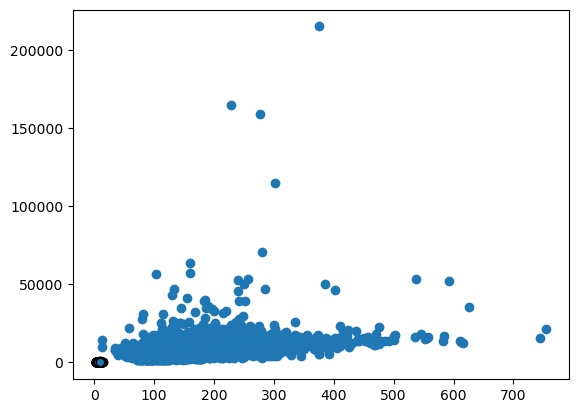

Text(0, 0.5, 'Sale price')

In [47]:
# TODO
plt.plot(x, y, "o", mec='k')
plt.show()
plt.xlabel("Total Rooms Above Ground")
plt.ylabel("Sale price")

## Fitting a Simple Linear Model

We will write a simple function to perform a linear fit under the squared loss function. Use the formulae given in the class to compute the optimal parameters $\beta_0,\beta_1$ in the linear model $$y =\beta_0 + \beta_1 x$$ as well as the optimal loss $\sum_{i=1}^n (y_i - \beta_0 - \beta_1 x)^2$.

In [48]:

def fit_linear(x,y):
    """
    Given vectors of data points (x,y), performs a fit for the linear model:
       y = beta0 + beta1*x,
    The function returns beta0, beta1, and loss, where loss is the sum-of-squares loss of.
    """
    # TODO complete the following code
    xm = np.mean(x)
    ym = np.mean(y)
    syx = np.mean((y-ym)*(x-xm))
    sxx = np.mean((x-xm)**2)
    syy = np.mean((y-ym)**2)

    beta1 = syx/sxx
    beta0 = ym - beta1*xm
   
    yp = beta0 + beta1 * x
    loss = np.sum((yp)**2)
    return beta0, beta1, loss


Using the function `fit_linear` above, print the values `beta0`, `beta1` and `loss` for the linear model of price vs. number of rooms.

In [49]:
# TODO
x = df['TotRms AbvGrd'].to_numpy()
y = df['SalePrice'].to_numpy()
beta0, beta1, loss = fit_linear(x,y)
yp = beta0 + beta1 * x
print("beta 0 is ", beta0)
print("beta 1 is ",beta1)
print("loss is ",loss)

beta 0 is  18.66540256609599
beta 1 is  25.163832317053643
loss is  100362463.42185989


Replot the scatter plot above, but now with the regression line.  You can create the regression line by creating points `yp` that are the predicted values for each value in `x`, according to our linear model. Plot as a line, not a scatter plot.

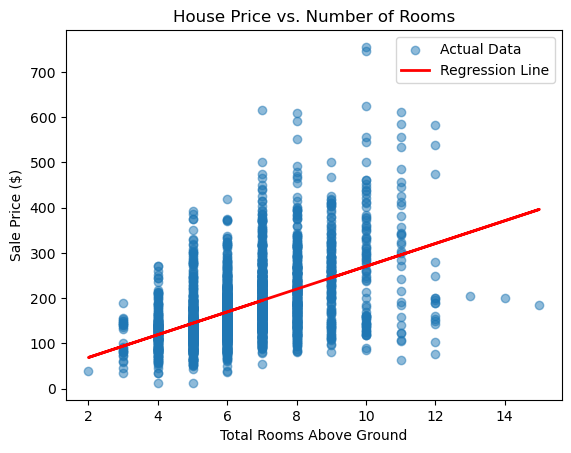

In [50]:
# TODO
plt.scatter(x, y, alpha=0.5, label='Actual Data')
plt.plot(x, yp, color='red', linewidth=2, label='Regression Line')
plt.xlabel('Total Rooms Above Ground')
plt.ylabel('Sale Price ($)')
plt.title('House Price vs. Number of Rooms')
plt.legend()
plt.show()

# Part 2:  Compare different dependent variables


We next compute the squared loss for all the predictors and output the values in a table. Your table should look like the following, where each entry in the first column is the attribute name and the second column is the squared loss.

    Lot Area           XXXXX
    Overall Qual       XXXXX
    Overall Cond       XXXXX
    ...         ...

You will need to write a loop to perform this task.

What variable does the best job predicting house price?

In [51]:
# TODO
## Create a list of labels 
## Create a dictionary 
index_list = df.columns.to_list()
print(index_list)
dictionary = {}
min = 2**32
## Convert the index name to a key
for i in index_list: 
    if i != 'SalePrice': 
        beta0, beta1, loss_val = fit_linear(df[i], y)
        dictionary[i] = loss_val
        if loss_val < min: 
            min = loss_val
            best_fit = i

## key = attribute name 
## val = squared loss 
## Convert df columns to dict keys 
print(dictionary)
print(best_fit)

['Lot Area', 'Year Built', 'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Gr Liv Area', 'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'TotRms AbvGrd', 'Fireplaces', 'Garage Cars', 'Garage Area', 'SalePrice']
{'Lot Area': np.float64(97101617.41230434), 'Year Built': np.float64(101602616.39030914), 'Bsmt Unf SF': np.float64(96398615.9380179), 'Total Bsmt SF': np.float64(103250519.44466403), '1st Flr SF': np.float64(102997853.75600356), '2nd Flr SF': np.float64(97129908.9108392), 'Gr Liv Area': np.float64(105111170.85939288), 'Full Bath': np.float64(101338002.97921778), 'Half Bath': np.float64(97292439.32237813), 'Bedroom AbvGr': np.float64(96160683.47075917), 'TotRms AbvGrd': np.float64(100362463.42185989), 'Fireplaces': np.float64(99983200.91882841), 'Garage Cars': np.float64(103619644.6582508), 'Garage Area': np.float64(103439731.84415996)}
Bedroom AbvGr


### What variable does the best job predicting house price? BEedroom Abvgr
The bedrooms above ground is the best predictor of housing price

**TODO:** Describe in words the meaning of the most predictive variable for housing price.

The meaning of the most predictive variable for housing price is which variable provides the most accurate predictions when used to predict housing price. 

# Part 3:  Compare different loss functions

## A Brute force algorithm for squared loss

Your code in `fit_linear` relies on the closed form expressions for the optimal $\beta_0$ and $\beta_1$, which we derived in class. However, if you did not know these formulas, you could have approximately minimized the loss function by brute force searching over a grid of possible values for $\beta_0$ and $\beta_1$.

For example, we could try out all combinations of parameters where $\beta_0$ is in `np.arange(-50,50,.1)` and $\beta_1$ is in `np.arange(-1,1,.005)`

Write a function which takes this approach to find a $\beta_0$ and $\beta_1$ which approximately minimize the squared loss: $\sum_{i=1}^n (y_i - \beta_0 - \beta_1 x)^2$

In [52]:
def fit_approx(x,y):
    """
    Given vectors of data points (x,y), performs an *approximate* fit for the linear model:
       y = beta0 + beta1*x,
    under the sum-of-squares loss. The min_loss returned is the lost of the best beta0 and beta1 you found.
    """
    # TODO complete the following code
    # beta0_grid = np.arange(-50, 50, 0.1)
    # beta1_grid = np.arange(-1, 1, 0.005)
    
    # beta0_grid = np.arange(0, 300, 1.0)      
    beta0_grid = np.arange(-10000, 10000, 100)    
    beta1_grid = np.arange(-0.1, 0.1, 0.0001)
    
    # Create 2D array and go through every single combination 
    min_loss = float('inf')
    best_beta0 = None
    best_beta1 = None
    
    for b0 in beta0_grid:
        for b1 in beta1_grid:
            y_pred = b0 + b1 * x
            current_loss = np.sum((y - y_pred)**2)
            
            if current_loss < min_loss:
                min_loss = current_loss
                best_beta0 = b0
                best_beta1 = b1
                
    return best_beta0, best_beta1, min_loss

Compare the output of `fit_approx` and `fit_linear` with `y` being `SalePrice` and `x` being the `Gr Liv Area` variable from our dataset. You should do so:
* quantitatively, by printing the loss that each approach achieves
* and visually, by plotting the different fit lines obtained.

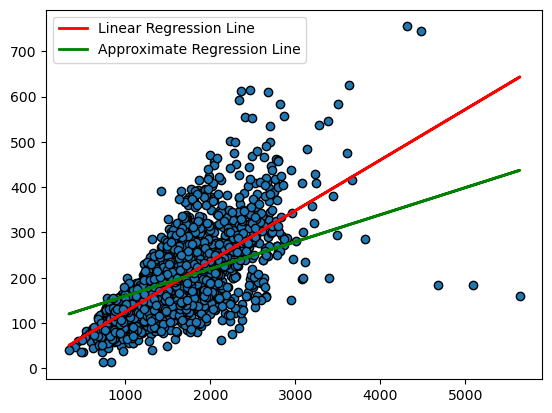

In [53]:
x = df['Gr Liv Area'].to_numpy() 
y = df['SalePrice'].to_numpy() 

beta0_lin, beta1_lin, loss_lin = fit_linear(x,y)
beta0_app, beta1_app, loss_app = fit_approx(x,y)

ypred_lin = beta0_lin + beta1_lin * x
ypred_app = beta0_app + beta1_app * x

plt.plot(x, y, 'o', mec='k')
plt.plot(x, ypred_lin, color='red', linewidth=2, label='Linear Regression Line')
plt.plot(x, ypred_app, color='green', linewidth=2, label='Approximate Regression Line')
plt.legend()
plt.show()




## Extending to different loss functions

One benefit of the above approach is that is easily extends to different loss funtions. Write functions which find an approximately optimal $\beta_0$ and $\beta_1$ for
* minimizing the $\ell_1$ (least absolute deviations) loss: $\sum_{i=1}^n |y_i - \beta_0 - \beta_1 x|$
* minimizing the $\ell_\infty$ (max) loss: $\max_i |y_i - \beta_0 - \beta_1 x|$


In [54]:
import math
def fit_approx_l1(x,y):
    """
    Given vectors of data points (x,y), performs an *approximate* fit for the linear model:
       y = beta0 + beta1*x,
    under the least absolute deviations loss.
    """

    # TODO complete the following code
    
    # xm = np.mean(x)
    # ym = np.mean(y)
    # syx = np.mean((y-ym)*(x-xm))
    # sxx = np.mean((x-xm)**2)
    # syy = np.mean((y-ym)**2)

    # beta1 = syx/sxx
    # beta0 = ym - beta1*xm
    
    # ypred = beta0 + beta1*x
    
    # # The sum of all the losses
    # min_loss = sum(abs(y - (beta0 + beta1*x)))
    
    # beta0_grid = np.arange(-50, 50, 0.1)
    # beta1_grid = np.arange(-1, 1, 0.005)
    
    #beta0_grid = np.arange(0, 300, 1.0)     
    beta0_grid = np.arange(-10000, 10000, 100)      
    beta1_grid = np.arange(-0.1, 0.1, 0.0001)
    
    
    # Create 2D array and go through every single combination 
    min_loss = float('inf')
    best_beta0 = None
    best_beta1 = None
    
    for b0 in beta0_grid:
        for b1 in beta1_grid:
            y_pred = b0 + b1 * x
            current_loss = np.sum(np.abs(y - y_pred))
            
            if current_loss < min_loss:
                min_loss = current_loss
                best_beta0 = b0
                best_beta1 = b1
    
    beta0 = best_beta0
    beta1 = best_beta1

    return beta0, beta1, min_loss

 
b0, b1, ml = fit_approx_l1(x,y)
print(ml)
 
 

129704.08549999999


In [55]:
def fit_approx_max(x,y):
    """
    Given vectors of data points (x,y), performs an *approximate* fit for the linear model:
       y = beta0 + beta1*x,
    under the max loss.
    """
    # TODO complete the following code
    # xm = np.mean(x)
    # ym = np.mean(y)
    # syx = np.mean((y-ym)*(x-xm))
    # sxx = np.mean((x-xm)**2)
    # syy = np.mean((y-ym)**2)


    # beta1 = syx/sxx
    # beta0 = ym - beta1*xm
    # ypred = beta0 + beta1*x
    
    # min_loss = max(abs(y - (beta0 + beta1*x)))
    # beta0_grid = np.arange(-50, 50, 0.1)
    # beta1_grid = np.arange(-1, 1, 0.005)
    
    # beta0_grid = np.arange(0, 300, 1.0)     
    beta0_grid = np.arange(-10000, 10000, 100)      
    beta1_grid = np.arange(-0.1, 0.1, 0.0001)
    
    # Create 2D array and go through every single combination 
    min_loss = float('inf')
    best_beta0 = None
    best_beta1 = None
    
    for b0 in beta0_grid:
        for b1 in beta1_grid:
            y_pred = b0 + b1 * x
            current_loss = np.max(np.abs((y - y_pred)))
            
            if current_loss < min_loss:
                min_loss = current_loss
                best_beta0 = b0
                best_beta1 = b1

    return best_beta0, best_beta1, min_loss

 
b0, b1, ml = fit_approx_max(x,y)
print(ml)

318.6143999999838


**TODO:** Use your algorithm to obtain 3 different linear fits for `SalePrice` with predictor variable `Gr Liv Area`, one for squared loss, one for $\ell_1$ loss, and one for $\ell_\infty$ loss. Plot the linear fits (along with the data scatter plot) on a single figure and use a legend to indicate which fit corresponds to which loss.

**TODO:** Repeat the process above for the `Lot Area` predictor variable, which has some more extreme outliers. Note that  this variable has a different scale than `Gr Liv Area` so you might need to adjust your approximate fit functions accordingly.

Again produce a plot that contains three different linear fits for all three different loss functions. Write 1-2 sentences of discussion about how the choice of loss function effected the fit.

The squared loss is 6963670588.4420595, the L1 loss is 1105578.5985431992, and the max loss is 2662.07


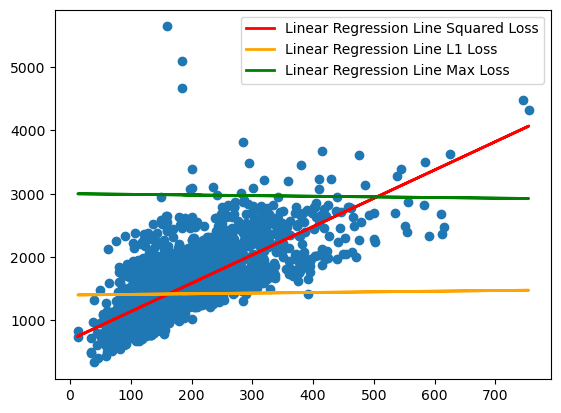

In [56]:
x = df['SalePrice'].to_numpy()
y = df['Gr Liv Area'].to_numpy()

plt.scatter(x, y)

# Plot the 3 diff linear fits 
# Squred loss, l1 loss, and lmax loss 
# Add labels for legend 
# plt.plot(x, ypred_lin, color='red', linewidth=2, label='Linear Regression Line')
# plt.plot(x, ypred_app, color='green', linewidth=2, label='Approximate Regression Line')\

beta0, beta1, loss = fit_linear(x,y) 
b0_l1, b1_l1, loss_l1 = fit_approx_l1(x,y)
b0_max, b1_max, loss_max = fit_approx_max(x,y)

y_pred = beta0 + beta1*x
ypred_l1 = b0_l1 + b1_l1*x
ypred_max = b0_max + b1_max * x

print(f"The squared loss is {loss}, the L1 loss is {loss_l1}, and the max loss is {loss_max}")

plt.plot(x, y_pred, color='red', linewidth=2, label='Linear Regression Line Squared Loss') 
plt.plot(x, ypred_l1, color='orange', linewidth=2, label='Linear Regression Line L1 Loss') 
plt.plot(x, ypred_max, color='green', linewidth=2, label='Linear Regression Line Max Loss') 

plt.legend()
plt.show()

The squared loss is 181932116713.58133, the L1 loss is 9810035.7041016, and the max loss is 205307.5375


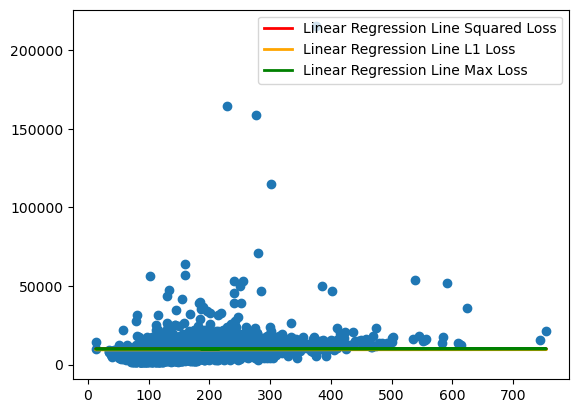

In [57]:
x = df['SalePrice'].to_numpy()
y = df['Lot Area'].to_numpy()

plt.scatter(x, y)

# Plot the 3 diff linear fits 
# Squred loss, l1 loss, and lmax loss 
# Add labels for legend 
# plt.plot(x, ypred_lin, color='red', linewidth=2, label='Linear Regression Line')
# plt.plot(x, ypred_app, color='green', linewidth=2, label='Approximate Regression Line')\
    
beta0, beta1, loss = fit_approx(x,y) 
b0_l1, b1_l1, loss_l1 = fit_approx_l1(x,y)
b0_max, b1_max, loss_max = fit_approx_max(x,y)

y_pred = beta0 + beta1*x
ypred_l1 = b0_l1 + b1_l1*x
ypred_max = b0_max + b1_max * x

print(f"The squared loss is {loss}, the L1 loss is {loss_l1}, and the max loss is {loss_max}")

plt.plot(x, y_pred, color='red', linewidth=2, label='Linear Regression Line Squared Loss') 
plt.plot(x, ypred_l1, color='orange', linewidth=2, label='Linear Regression Line L1 Loss') 
plt.plot(x, ypred_max, color='green', linewidth=2, label='Linear Regression Line Max Loss') 

plt.legend()
plt.show()

Again produce a plot that contains three different linear fits for all three different loss functions. Write 1-2 sentences of discussion about how the choice of loss function effected the fit.

The different loss functions affected how much the outliers affected the linear regression model. In this case, it seems the squared loss function provided the most accurate linear regression model, as it followed the general trend of the data.